In [258]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [281]:

import numpy as np
# load the data
df = pd.read_csv('C:/Users/Pc/Desktop/87/der10.csv')  # read the data
df["timestamp"] = df["timestamp"].astype(np.datetime64)  # set the data type of the datetime column to np.datetime64
df.set_index("timestamp", inplace=True)  # set the datetime columns to be the index
df.index.name = "datetime"  # change the name of the index

# show the data frame
df.head()

,Active_Energy_Delivered_Received,Current_Phase_Average,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
datetime,,,,,,,,,,,,
2016-01-13 10:40:00,248273,11.301332,8.104333,1.742816,33.222595,38.695026,769.756836,413.830200,212.455246,0.4,722.958252,412.120819
2016-01-13 10:45:00,248274,11.198668,8.041466,1.966872,32.913258,39.545296,739.246521,381.215393,289.315277,0.4,696.304810,403.550964
2016-01-13 10:50:00,248275,13.590000,9.834001,2.136409,33.199280,39.263096,867.375977,322.674377,213.017365,0.4,778.138367,343.069183
2016-01-13 10:55:00,248276,16.206667,11.770533,1.850486,33.545677,38.246296,1086.529175,307.127716,253.459686,0.4,931.213623,306.924164
2016-01-13 11:00:00,248276,15.282665,11.076467,2.187219,33.771397,35.557007,1030.990234,223.120346,167.188431,0.4,962.701294,255.280258


In [302]:
df.shape

(2176, 10)

In [282]:
df.drop('Active_Energy_Delivered_Received', axis=1, inplace=True)
df.drop('Current_Phase_Average', axis=1, inplace=True)
#df.drop('Radiation_Global_Tilted', axis=1, inplace=True)
#df.drop('Radiation_Diffuse_Tilted', axis=1, inplace=True)

In [283]:
df.columns

Index(['Active_Power', 'Wind_Speed', 'Weather_Temperature_Celsius',
       'Weather_Relative_Humidity', 'Global_Horizontal_Radiation',
       'Diffuse_Horizontal_Radiation', 'Wind_Direction',
       'Weather_Daily_Rainfall', 'Radiation_Global_Tilted',
       'Radiation_Diffuse_Tilted'],
      dtype='object')

In [284]:
for j in range(1,10):
       print(df.iloc[:, j].unique())

[1.74281551 1.96687167 2.1364094  ... 3.15548302 3.37194501 4.26326033]
[33.22259521 32.9132576  33.19927979 ... 30.87727356 30.92257881
 31.19328117]
[38.6950264  39.54529572 39.26309586 ... 39.74971771 39.22477341
 37.92790222]
[769.75683594 739.246521   867.37597656 ...   2.27815008   1.93161118
   1.42670214]
[413.8302002  381.21539307 322.67437744 ...   0.85792428   0.62664413
   0.62484473]
[212.45524597 289.3152771  213.0173645  ... 211.56394958 213.65884399
 264.76037598]
[0.40000001 0.60000002 0.         0.2       ]
[722.95825195 696.30480957 778.1383667  ...   1.33692908   1.23480248
   0.94185275]
[412.12081909 403.55096436 343.06918335 ...   1.94671941   1.88288426
   1.71559501]


In [285]:
df['Active_Power'].resample('D').sum()

datetime
2016-01-13     812.424130
2016-01-14     208.930066
2016-01-15     888.671792
2016-01-16    1042.657994
2016-01-17    1148.137400
2016-01-18    1112.662130
2016-01-19    1001.126604
2016-01-20     884.142000
Freq: D, Name: Active_Power, dtype: float64

In [286]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,10):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[8, 9]

In [287]:
for j in range(0,10):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())
# another sanity check to make sure that there are not more any nan
df.isnull().sum()

Active_Power                    0
Wind_Speed                      0
Weather_Temperature_Celsius     0
Weather_Relative_Humidity       0
Global_Horizontal_Radiation     0
Diffuse_Horizontal_Radiation    0
Wind_Direction                  0
Weather_Daily_Rainfall          0
Radiation_Global_Tilted         0
Radiation_Diffuse_Tilted        0
dtype: int64

In [288]:
df.describe()

,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
count,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000,2176.000000
mean,3.262294,2.525958,26.272719,49.916917,288.946010,105.119191,162.818176,0.173713,270.151287,103.671200
std,4.350499,1.235879,6.694413,25.517363,383.939981,154.698668,180.974905,0.211330,361.717579,150.942555
min,-0.000533,0.403430,14.177679,15.583544,1.248573,0.446716,-3157.839355,0.000000,0.179107,1.197661
25%,0.000067,1.522652,20.587694,26.123252,2.627640,1.129505,128.547905,0.000000,1.597175,1.879372
50%,0.321900,2.475131,25.178397,44.338915,36.408375,31.461158,156.637299,0.000000,33.450953,32.011514
75%,6.927767,3.304614,32.149720,73.916908,585.310730,137.618256,235.137524,0.400000,555.841064,136.451138
max,14.846535,11.082863,40.242146,98.972397,1275.909058,685.634766,327.353607,0.600000,1186.043701,646.366211


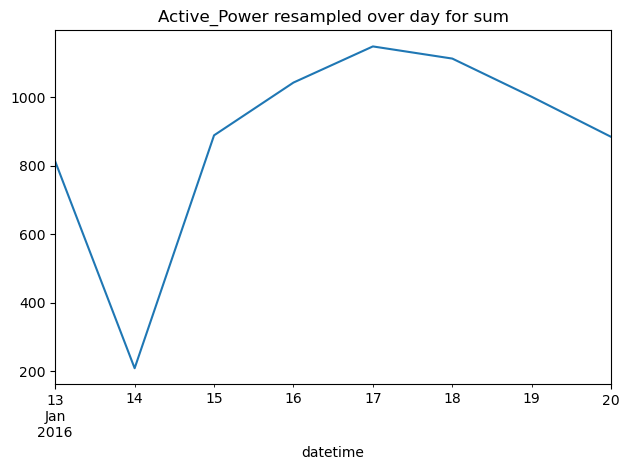

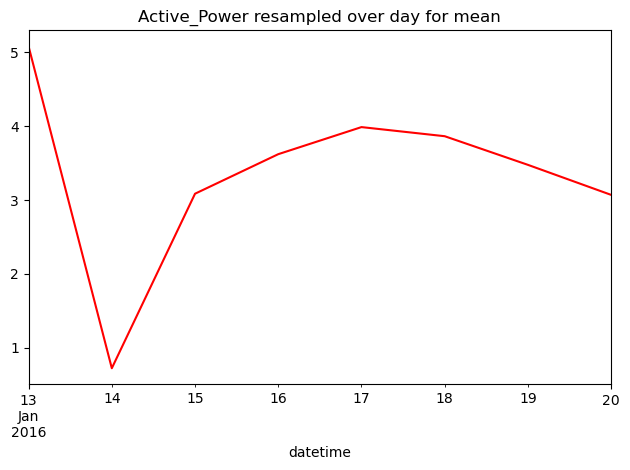

In [289]:
df.Active_Power.resample('D').sum().plot(title='Active_Power resampled over day for sum') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

df.Active_Power.resample('D').mean().plot(title='Active_Power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

In [290]:


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [291]:
## If you would like to train based on the resampled data (over hour), then used below
values = df.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
#reframed.drop(reframed.columns[[8,9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.drop(reframed.columns[[10,11,12,13,14,15,16,17,18,19]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.545890   0.125417   0.730685   0.277153   0.602912   0.603314   
2   0.541656   0.146397   0.718817   0.287350   0.578976   0.555714   
3   0.662389   0.162273   0.729791   0.283965   0.679497   0.470276   
4   0.792821   0.135499   0.743081   0.271772   0.851427   0.447587   
5   0.746073   0.167030   0.751741   0.239522   0.807856   0.324982   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  
1   0.967032   0.666667   0.609496    0.636924  
2   0.989086   0.666667   0.587020    0.623641  
3   0.967194   0.666667   0.656027    0.529895  
4   0.978798   0.666667   0.785110    0.473871  
5   0.954044   0.666667   0.811663    0.393824  


In [298]:
# split into train and test sets
values = reframed.values

n_train_time = 1800
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(1800, 1, 9) (1800,) (375, 1, 9) (375,)


Epoch 1/100
26/26 - 6s - loss: 0.0361 - val_loss: 0.0351 - 6s/epoch - 221ms/step
Epoch 2/100
26/26 - 3s - loss: 0.0244 - val_loss: 0.0197 - 3s/epoch - 121ms/step
Epoch 3/100
26/26 - 3s - loss: 0.0159 - val_loss: 0.0128 - 3s/epoch - 123ms/step
Epoch 4/100
26/26 - 3s - loss: 0.0105 - val_loss: 0.0070 - 3s/epoch - 122ms/step
Epoch 5/100
26/26 - 3s - loss: 0.0061 - val_loss: 0.0044 - 3s/epoch - 124ms/step
Epoch 6/100
26/26 - 3s - loss: 0.0036 - val_loss: 0.0027 - 3s/epoch - 127ms/step
Epoch 7/100
26/26 - 3s - loss: 0.0018 - val_loss: 0.0018 - 3s/epoch - 125ms/step
Epoch 8/100
26/26 - 3s - loss: 0.0011 - val_loss: 0.0017 - 3s/epoch - 126ms/step
Epoch 9/100
26/26 - 3s - loss: 9.3536e-04 - val_loss: 0.0022 - 3s/epoch - 122ms/step
Epoch 10/100
26/26 - 3s - loss: 0.0012 - val_loss: 0.0040 - 3s/epoch - 129ms/step
Epoch 11/100
26/26 - 4s - loss: 0.0025 - val_loss: 0.0115 - 4s/epoch - 137ms/step
Epoch 12/100
26/26 - 4s - loss: 0.0073 - val_loss: 0.0366 - 4s/epoch - 164ms/step
Epoch 13/100
26/26 - 

Epoch 100/100
26/26 - 4s - loss: 8.4892e-04 - val_loss: 0.0014 - 4s/epoch - 148ms/step


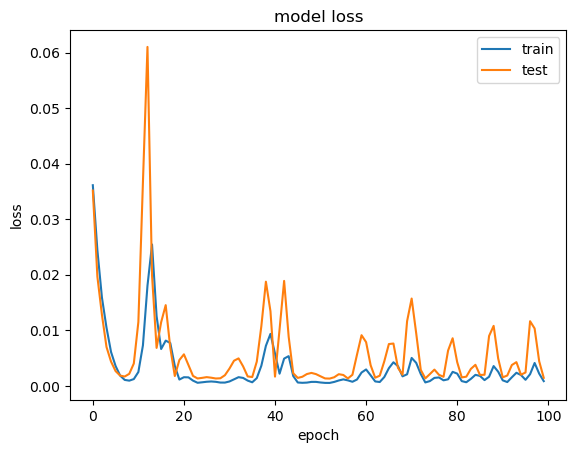

In [299]:
model = Sequential()
model.add(LSTM(2000, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [300]:
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:

from keras.layers import Dropout# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 9))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -12:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -12:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

12/12 [==============================] - 1s 15ms/step
Test RMSE: 0.565


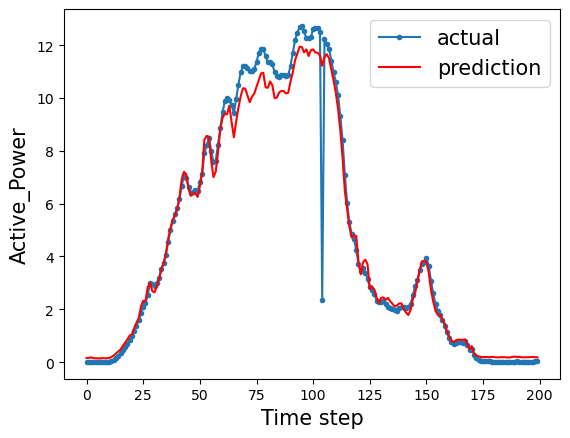

In [301]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 120 hours. 

aa=[x for x in range(0,200)]
plt.plot(aa, inv_y[150:350], marker='.', label="actual")
plt.plot(aa, inv_yhat[150:350], 'r', label="prediction")
plt.ylabel('Active_Power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
#plt.yticks([])
plt.show()